# Health & Economic Insights from Global Dataset

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

## 📈 Correlation Heatmap

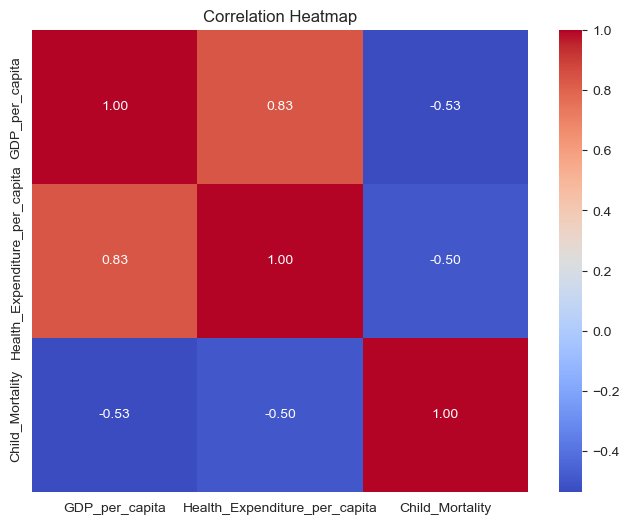

In [3]:

corr = pd.DataFrame({'GDP_per_capita': {'GDP_per_capita': 1.0, 'Health_Expenditure_per_capita': 0.8323564227765442, 'Child_Mortality': -0.5349093248273831}, 'Health_Expenditure_per_capita': {'GDP_per_capita': 0.8323564227765442, 'Health_Expenditure_per_capita': 1.0, 'Child_Mortality': -0.4960709784896134}, 'Child_Mortality': {'GDP_per_capita': -0.5349093248273831, 'Health_Expenditure_per_capita': -0.4960709784896134, 'Child_Mortality': 1.0}})

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


## 🌍 Trends in Richest vs Poorest Countries (2022)

**Richest**: Luxembourg

**Poorest**: Philippines

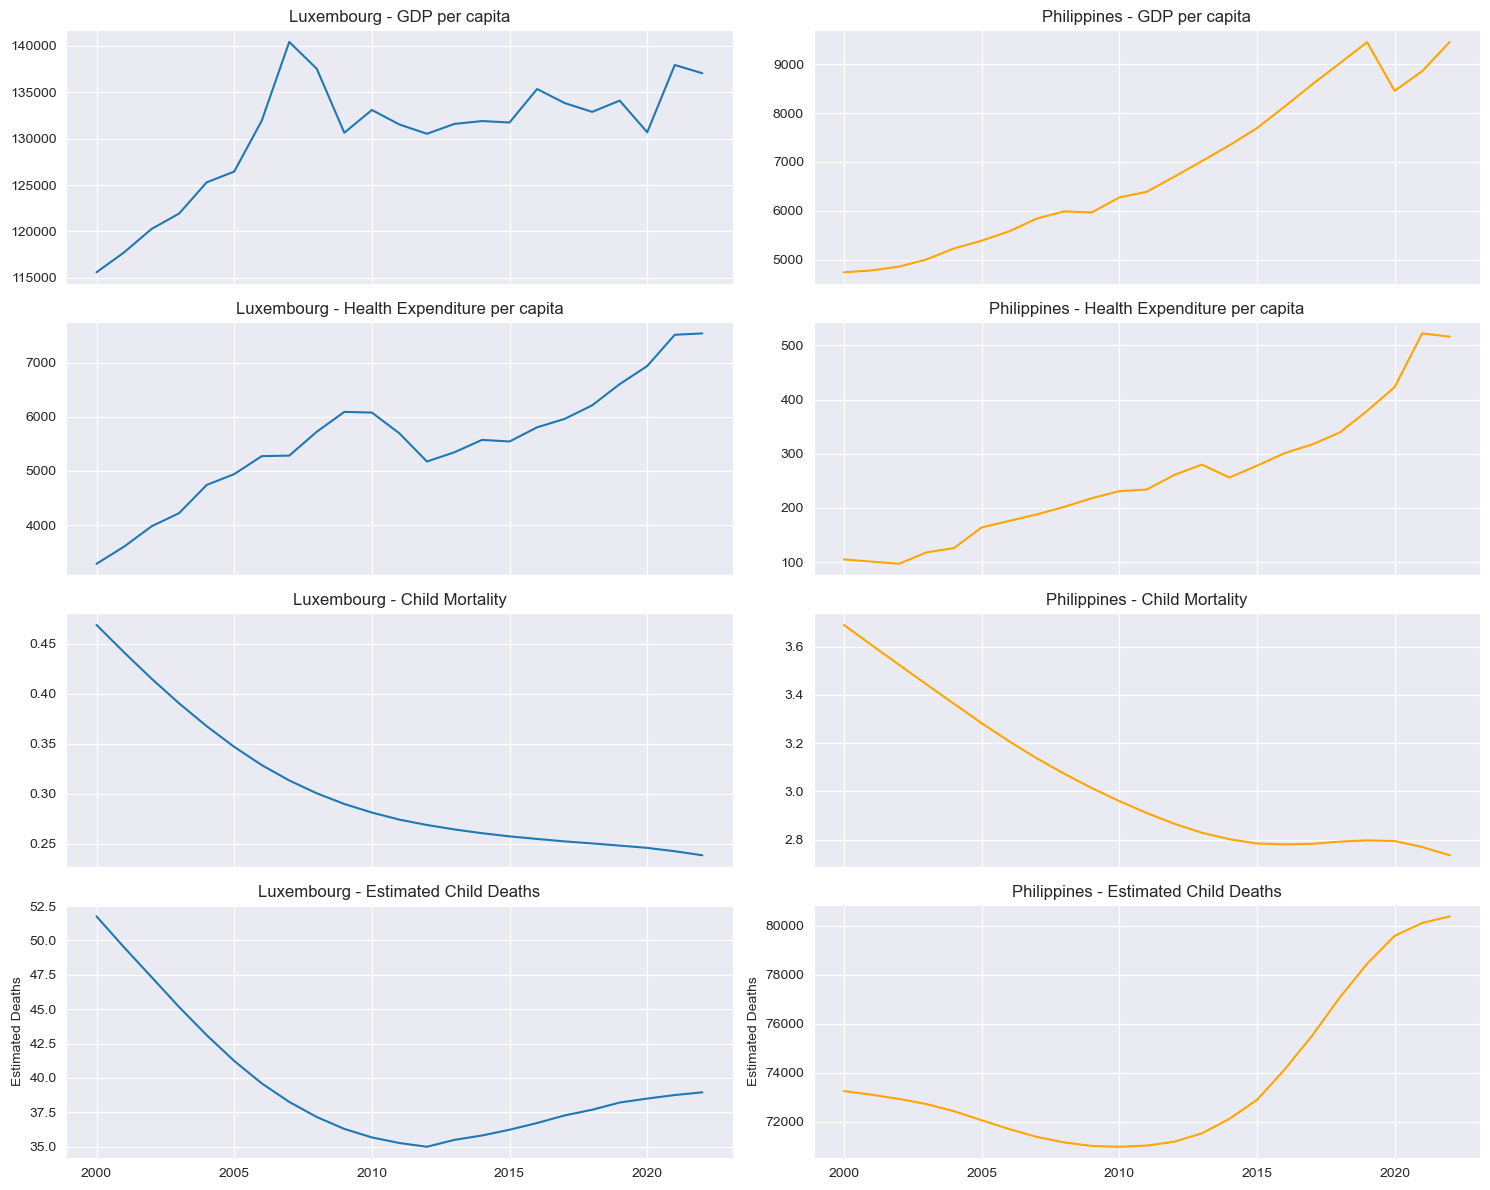

In [5]:
# Add estimated population per year (can be replaced with real values if available)
# For demo, we use rough estimates:
lux_population = [
    441525, 448569, 456127, 462690, 469086, 475475, 481940, 488367, 494615, 500876,
    507314, 514487, 520672, 537039, 549680, 562958, 576249, 590667, 602005, 615729,
    626108, 639070, 653103
]
phl_population = [
    79410901, 81075780, 82769327, 84473825, 86160502, 87816235, 89429443, 91020646, 92629867, 94267026,
    95937599, 97641213, 99379530, 101166423, 102982554, 104748594, 106651394, 108559870, 110418331, 112190220,
    113934679, 115713503, 117554274
]

rich_df["Population"] = lux_population
poor_df["Population"] = phl_population

# Estimate births and deaths
for df in [rich_df, poor_df]:
    df["Estimated_Births"] = df["Population"] * 0.025
    df["Estimated_Child_Deaths"] = (df["Child_Mortality"] / 100) * df["Estimated_Births"]

# Plot everything
fig, axs = plt.subplots(4, 2, figsize=(15, 12), sharex=True)
metrics = ["GDP_per_capita", "Health_Expenditure_per_capita", "Child_Mortality", "Estimated_Child_Deaths"]

for i in range(4):
    metric = metrics[i]
    axs[i][0].plot(rich_df["Year"], rich_df[metric])
    axs[i][0].set_title(f"Luxembourg - {metric.replace('_', ' ')}")

    axs[i][1].plot(poor_df["Year"], poor_df[metric], color='orange')
    axs[i][1].set_title(f"Philippines - {metric.replace('_', ' ')}")

axs[3][0].set_ylabel("Estimated Deaths")
axs[3][1].set_ylabel("Estimated Deaths")

plt.tight_layout()
plt.show()
